In [1]:
import numpy as np

In [2]:
data_dir = "."
model_label = "turkish_model_100_size"
from main import explain_using_raw_probs
indexed_Cs, zero_centered_Ps, id_to_morpho_tag, explanations, explanations_nparray_dict = \
            explain_using_raw_probs(model_label, data_dir)

In [3]:
indexed_Cs.keys()

dict_keys(['ORG', 'LOC', 'PER'])

In [4]:

M = indexed_Cs['LOC'][0][0].shape[0]

In [5]:
indexed_Cs['LOC'].shape

(6778,)

In [6]:
indexed_Cs['LOC'][0].shape

(6, 181)

In [7]:
n_samples_0 = indexed_Cs['LOC'][0].shape[0]

In [8]:
indexed_Cs['LOC'][0][:3]

array([[ 1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [-1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,

In [9]:
zero_centered_Ps['LOC'][0]

[0.0,
 0.00014230000000003962,
 -0.0003341999999999512,
 -0.0020063999999999638,
 -0.0006113999999999287,
 -0.02464809999999995]

In [10]:
import seaborn as sns

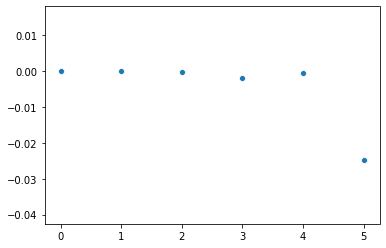

In [11]:
sns.scatterplot(range(n_samples_0), zero_centered_Ps['LOC'][0])

In [12]:
explanations_nparray_dict['LOC'].shape

(6778, 181)

[(0, -0.0033518559999999864), (1, -0.00316125599999999), (2, -0.0024923759999999854), (3, -0.0030503759999999996), (11, 0.006564304000000013)]


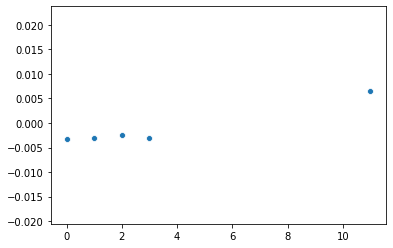

In [13]:
morph_tags_nonzero = [m for m in range(M) if explanations_nparray_dict['LOC'][0][m] != 0]
importance_values_nonzero = [explanations_nparray_dict['LOC'][0][m] for m in morph_tags_nonzero]
print(list(zip(morph_tags_nonzero, importance_values_nonzero)))
sns.scatterplot(morph_tags_nonzero, importance_values_nonzero)

In [18]:
norm_explanations_nparray_dict = dict()
for entity_type in explanations_nparray_dict.keys():
    print(entity_type)
    not_all_zero_row_indices = np.where(np.sum(explanations_nparray_dict[entity_type] == 0, axis=1) != M)
    explanations_nparray_dict[entity_type] = explanations_nparray_dict[entity_type][not_all_zero_row_indices]
    norm_explanations_nparray_dict[entity_type] = (explanations_nparray_dict[entity_type]-np.mean(explanations_nparray_dict[entity_type], axis=1, keepdims=True))/np.std(explanations_nparray_dict[entity_type], axis=1, keepdims=True)

ORG
LOC
PER


In [19]:
explanations_nparray_dict['ORG']

array([[-4.18107333e-07, -4.43187333e-07,  3.53800667e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.21794400e-03,  1.47306400e-03,  2.22304000e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.07573600e-03, -2.05989600e-03, -8.57993600e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.08444444e-06, -4.84444444e-07, -1.88444444e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.90349960e-04,  1.63996040e-04,  1.74388040e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.43045600e-03, -4.39997600e-03, -4.44665600e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
explanations_nparray_dict['ORG'][np.where(np.sum(explanations_nparray_dict['ORG'] == 0, axis=1) != M)]

array([[-4.18107333e-07, -4.43187333e-07,  3.53800667e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.21794400e-03,  1.47306400e-03,  2.22304000e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.07573600e-03, -2.05989600e-03, -8.57993600e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.08444444e-06, -4.84444444e-07, -1.88444444e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.90349960e-04,  1.63996040e-04,  1.74388040e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.43045600e-03, -4.39997600e-03, -4.44665600e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [22]:
np.sum(explanations_nparray_dict['ORG'] == np.inf)

0

In [20]:
1/explanations_nparray_dict['ORG'][1332]

/Users/onur.gungor/.virtualenvs/dynet3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 6796.18822487,  6769.2843077 ,  6096.27836519,  5927.55211787,
                  inf, -1985.9793999 ,            inf,            inf,
                  inf,            inf,            inf,  6594.21365206,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
      

In [23]:
norm_explanations_nparray_dict['LOC'].shape

(6778, 181)

In [24]:
id_to_morpho_tag[1]

'A3sg'

In [25]:
concatenated_norm_explanations = None
region_entity_types = []
for entity_type in norm_explanations_nparray_dict.keys():
    print(entity_type)
    region_entity_types += [entity_type] * norm_explanations_nparray_dict[entity_type].shape[0]
    if concatenated_norm_explanations is None:
        concatenated_norm_explanations = norm_explanations_nparray_dict[entity_type]
    else:
        concatenated_norm_explanations = np.concatenate((concatenated_norm_explanations,
                                                         norm_explanations_nparray_dict[entity_type]),
                                                        axis=0)
                                                         
                                                         
                                                         
                                                         

ORG
LOC
PER


In [26]:
concatenated_norm_explanations.shape

(22363, 181)

In [27]:
len(region_entity_types)

22363

In [28]:
region_entity_types[:3]

['ORG', 'ORG', 'ORG']

In [29]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
import sklearn
le = sklearn.preprocessing.LabelEncoder()
le.fit(region_entity_types)

LabelEncoder()

In [32]:
le.transform(region_entity_types)

array([1, 1, 1, ..., 2, 2, 2])

In [33]:
le.classes_

array(['LOC', 'ORG', 'PER'], dtype='<U3')

In [34]:
[int(x) for x in [True, False]]

[1, 0]

In [38]:
from sklearn.linear_model import LogisticRegression

clf = {entity_type: dict() for entity_type in norm_explanations_nparray_dict.keys()}
scores = {entity_type: dict() for entity_type in norm_explanations_nparray_dict.keys()}

for entity_type in norm_explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
        
        clf[entity_type][morpho_tag_id] = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='multinomial', max_iter=1000, verbose=0)
        single_feature_X = concatenated_norm_explanations[:, morpho_tag_id].reshape([-1,1])
        binarized_y = [int(x == entity_type) for x in region_entity_types]
        y = binarized_y
        clf[entity_type][morpho_tag_id].fit(single_feature_X, y)
        scores[entity_type][morpho_tag_id] = clf[entity_type][morpho_tag_id].score(single_feature_X, y)
        print(entity_type, morpho_tag_id, morpho_tag, scores[entity_type][morpho_tag_id])

ORG 0 Noun 0.7197603183830434
ORG 1 A3sg 0.7113088583821491
ORG 2 Pnon 0.7197603183830434
ORG 3 Nom 0.7197603183830434
ORG 4 Verb 0.7209229530921611
ORG 5 Adj 0.71873183383267
ORG 6 P3sg 0.7195367347851361
ORG 7 Pos^DB 0.7207888029334169
ORG 8 Punc 0.7198050351026248
ORG 9 A3pl 0.7240084067432813
ORG 10 Pos 0.7203416357376022
ORG 11 Prop 0.7151097795465725
ORG 12 Acc 0.7199839019809506
ORG 13 Zero 0.7195814515047176
ORG 14 P2sg 0.7185529669543442
ORG 15 Gen 0.7198050351026248
ORG 16 Nom^DB 0.7234270893887225
ORG 17 Dat 0.7197603183830434
ORG 18 Loc 0.7193578679068103
ORG 19 Adverb 0.7191342843089031
ORG 20 Verb^DB 0.7181952331976926
ORG 21 Conj 0.7197603183830434
ORG 22 Num 0.7207440862138353
ORG 23 Pass 0.7185976836739257
ORG 24 P3pl 0.7253051916111434
ORG 25 Adj^DB 0.7226669051558378
ORG 26 PastPart 0.7197603183830434
ORG 27 Past 0.7185082502347627
ORG 28 Det 0.7198944685417877
ORG 29 Inf2 0.7202522022984393
ORG 30 Postp 0.7196708849438805
ORG 31 Card 0.7198050351026248
ORG 32 Pron 0

LOC 71 Recip 0.6607342485355274
LOC 72 PCAbl 0.6562178598578008
LOC 73 PCDat 0.6548763582703573
LOC 74 With^DB 0.6945400885391048
LOC 75 Cond 0.6878772973214685
LOC 76 Inf3 0.6611366990117605
LOC 77 Ques 0.6549210749899388
LOC 78 PresPart^DB 0.6829584581675089
LOC 79 Noun^DB 0.6969100746769217
LOC 80 Equ 0.6950319724545008
LOC 81 Inf2^DB 0.6546080579528686
LOC 82 Become 0.6549210749899388
LOC 83 Recip^DB 0.6679336403881412
LOC 84 Reflex 0.6548763582703573
LOC 85 While 0.6546974913920315
LOC 86 Narr^DB 0.6546974913920315
LOC 87 FitFor 0.6953002727719895
LOC 88 PCAbl^DB 0.6548763582703573
LOC 89 AfterDoingSo 0.65465277467245
LOC 90 Ord 0.6950319724545008
LOC 91 Able^DB 0.6548763582703573
LOC 92 Quant 0.6548763582703573
LOC 93 Become^DB 0.6544291910745428
LOC 94 AsIf 0.6583642623977105
LOC 95 *UNKNOWN* 0.6969100746769217
LOC 96 Acquire^DB 0.6548763582703573
LOC 97 Ly 0.6583642623977105
LOC 98 EDTag 0.6548763582703573
LOC 99 ETTag 0.6548763582703573
LOC 100 P2pl 0.6548763582703573
LOC 101 

PER 136 Abl^DB 0.5754147475741179
PER 137 PCIns^DB 0.5674104547690382
PER 138 Dist 0.5674104547690382
PER 139 Related^DB 0.5674104547690382
PER 140 SinceDoingSo 0.5673657380494567
PER 141 FitFor^DB 0.5674104547690382
PER 142 PCGen 0.5674104547690382
PER 143 ESTag 0.5674104547690382
PER 144 Range 0.5674104547690382
PER 145 Hastily 0.5674104547690382
PER 146 Ratio 0.5674104547690382
PER 147 When^DB 0.5674104547690382
PER 148 Distrib 0.5674104547690382
PER 149 Ins^DB 0.5674104547690382
PER 150 ActOf 0.5674104547690382
PER 151 PCAcc 0.5674998882082011
PER 152 WithoutBeingAbleToHaveDoneSo 0.5674104547690382
PER 153 Dist^DB 0.5674104547690382
PER 154 A3sg^DB 0.5674104547690382
PER 155 QuesP 0.5674104547690382
PER 156 *BLANK* 0.5674104547690382
PER 157 Hastily^DB 0.5674104547690382
PER 158 Percent 0.5674104547690382
PER 159 EverSince^DB 0.5674104547690382
PER 160 Adamantly 0.5674104547690382
PER 161 EverSince 0.5674104547690382
PER 162 A3pl^DB 0.5674104547690382
PER 163 Stay 0.567410454769038

In [39]:
scores.items()

dict_items([('ORG', {0: 0.7197603183830434, 1: 0.7113088583821491, 2: 0.7197603183830434, 3: 0.7197603183830434, 4: 0.7209229530921611, 5: 0.71873183383267, 6: 0.7195367347851361, 7: 0.7207888029334169, 8: 0.7198050351026248, 9: 0.7240084067432813, 10: 0.7203416357376022, 11: 0.7151097795465725, 12: 0.7199839019809506, 13: 0.7195814515047176, 14: 0.7185529669543442, 15: 0.7198050351026248, 16: 0.7234270893887225, 17: 0.7197603183830434, 18: 0.7193578679068103, 19: 0.7191342843089031, 20: 0.7181952331976926, 21: 0.7197603183830434, 22: 0.7207440862138353, 23: 0.7185976836739257, 24: 0.7253051916111434, 25: 0.7226669051558378, 26: 0.7197603183830434, 27: 0.7185082502347627, 28: 0.7198944685417877, 29: 0.7202522022984393, 30: 0.7196708849438805, 31: 0.7198050351026248, 32: 0.719626168224299, 33: 0.7196708849438805, 34: 0.7197603183830434, 35: 0.7191342843089031, 36: 0.7197603183830434, 37: 0.7266914099181684, 38: 0.7191342843089031, 39: 0.7197603183830434, 40: 0.7197156016634619, 41: 0.71

In [40]:
pred_entity_types = clf.predict(concatenated_norm_explanations)

AttributeError: 'dict' object has no attribute 'predict'

In [74]:
sum(pred_entity_types == le.transform(region_entity_types))

15748

In [41]:
concatenated_unnorm_explanations = None
region_entity_types = []
for entity_type in explanations_nparray_dict.keys():
    print(entity_type)
    region_entity_types += [entity_type] * explanations_nparray_dict[entity_type].shape[0]
    if concatenated_unnorm_explanations is None:
        concatenated_unnorm_explanations = explanations_nparray_dict[entity_type]
    else:
        concatenated_unnorm_explanations = np.concatenate((concatenated_unnorm_explanations,
                                                         explanations_nparray_dict[entity_type]),
                                                        axis=0)
                                                         
                                                         
                                                         
                                                         

ORG
LOC
PER


In [42]:
from sklearn.linear_model import LogisticRegression

clf = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}
scores = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}

print(scores)

for entity_tag in explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
        
        clf[entity_tag][morpho_tag_id] = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='multinomial', max_iter=1000, verbose=0)
        single_feature_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
        binarized_y = [int(x == entity_tag) for x in region_entity_types]
        y = binarized_y
        clf[entity_tag][morpho_tag_id].fit(single_feature_X, y)
        scores[entity_tag][morpho_tag_id] = clf[entity_tag][morpho_tag_id].score(single_feature_X, y)
        # print(scores)
        prior_prob_of_entity_tag_class = sum(binarized_y)/float(len(binarized_y))
        print(entity_tag, morpho_tag_id, morpho_tag, scores[entity_tag][morpho_tag_id], 
              prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class,
             max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class))

{'ORG': {}, 'LOC': {}, 'PER': {}}
ORG 0 Noun 0.7199839019809506 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 1 A3sg 0.7199839019809506 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 2 Pnon 0.7191342843089031 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 3 Nom 0.7195367347851361 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 4 Verb 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 5 Adj 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 6 P3sg 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 7 Pos^DB 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 8 Punc 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 9 A3pl 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 10 Pos 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.719760318383043

ORG 94 AsIf 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 95 *UNKNOWN* 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 96 Acquire^DB 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 97 Ly 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 98 EDTag 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 99 ETTag 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 100 P2pl 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 101 Desr 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 102 Without 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 103 Without^DB 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.7197603183830434
ORG 104 Interj 0.7197603183830434 0.28023968161695656 0.7197603183830434 0.71976031838

LOC 3 Nom 0.6965523409202701 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 4 Verb 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 5 Adj 0.6968206412377588 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 6 P3sg 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 7 Pos^DB 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 8 Punc 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 9 A3pl 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 10 Pos 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 11 Prop 0.7251263247328176 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 12 Acc 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 13 Zero 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 14 P2sg 0.6969100746769217 0.30308992

LOC 99 ETTag 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 100 P2pl 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 101 Desr 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 102 Without 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 103 Without^DB 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 104 Interj 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 105 Neces 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 106 PCDat^DB 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 107 Since 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 108 JustLike^DB 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.6969100746769217
LOC 109 Related 0.6969100746769217 0.3030899253230783 0.6969100746769217 0.69691007467

PER 9 A3pl 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 10 Pos 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 11 Prop 0.578097750749005 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 12 Acc 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 13 Zero 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 14 P2sg 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 15 Gen 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 16 Nom^DB 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 17 Dat 0.5828824397442204 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 18 Loc 0.5829271564638018 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 19 Adverb 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 20 Verb^DB 0.5833296069400349 0

PER 104 Interj 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 105 Neces 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 106 PCDat^DB 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 107 Since 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 108 JustLike^DB 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 109 Related 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 110 Pass^DB 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 111 Real 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 112 When 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 113 Prog2 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.5833296069400349
PER 114 Agt^DB 0.5833296069400349 0.4166703930599651 0.5833296069400349 0.58332960694003

In [43]:
scores

{'ORG': {0: 0.7199839019809506,
  1: 0.7199839019809506,
  2: 0.7191342843089031,
  3: 0.7195367347851361,
  4: 0.7197603183830434,
  5: 0.7197603183830434,
  6: 0.7197603183830434,
  7: 0.7197603183830434,
  8: 0.7197603183830434,
  9: 0.7197603183830434,
  10: 0.7197603183830434,
  11: 0.7199391852613692,
  12: 0.7197603183830434,
  13: 0.7197603183830434,
  14: 0.7197603183830434,
  15: 0.7197603183830434,
  16: 0.7197603183830434,
  17: 0.7197603183830434,
  18: 0.7197603183830434,
  19: 0.7197603183830434,
  20: 0.7197603183830434,
  21: 0.7197603183830434,
  22: 0.7197603183830434,
  23: 0.7197603183830434,
  24: 0.7197603183830434,
  25: 0.7197603183830434,
  26: 0.7197603183830434,
  27: 0.7197603183830434,
  28: 0.7197603183830434,
  29: 0.7197603183830434,
  30: 0.7197603183830434,
  31: 0.7197603183830434,
  32: 0.7197603183830434,
  33: 0.7197603183830434,
  34: 0.7197603183830434,
  35: 0.7197603183830434,
  36: 0.7197603183830434,
  37: 0.7197603183830434,
  38: 0.7197603

In [44]:
single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
single_case_y = np.array([int(x == 'LOC') for x in region_entity_types]).reshape([-1, 1])

In [45]:
single_case_y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [101]:
sns.scatterplot?

In [46]:
import pandas as pd

In [47]:
single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])

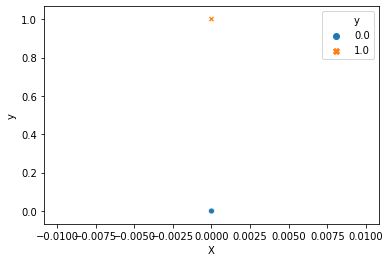

In [48]:
sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y")

In [49]:
import matplotlib.pyplot as plt

In [50]:
id_to_morpho_tag.items()

dict_items([(0, 'Noun'), (1, 'A3sg'), (2, 'Pnon'), (3, 'Nom'), (4, 'Verb'), (5, 'Adj'), (6, 'P3sg'), (7, 'Pos^DB'), (8, 'Punc'), (9, 'A3pl'), (10, 'Pos'), (11, 'Prop'), (12, 'Acc'), (13, 'Zero'), (14, 'P2sg'), (15, 'Gen'), (16, 'Nom^DB'), (17, 'Dat'), (18, 'Loc'), (19, 'Adverb'), (20, 'Verb^DB'), (21, 'Conj'), (22, 'Num'), (23, 'Pass'), (24, 'P3pl'), (25, 'Adj^DB'), (26, 'PastPart'), (27, 'Past'), (28, 'Det'), (29, 'Inf2'), (30, 'Postp'), (31, 'Card'), (32, 'Pron'), (33, 'Imp'), (34, 'Abl'), (35, 'PresPart'), (36, 'A2sg'), (37, 'Ness'), (38, 'Caus'), (39, 'Aor^DB'), (40, 'Prog1'), (41, 'Ins'), (42, 'Agt'), (43, 'Neg'), (44, 'Pres'), (45, 'With'), (46, 'Aor'), (47, 'FutPart'), (48, 'PCNom'), (49, 'Zero^DB'), (50, 'Demons'), (51, 'P1sg'), (52, 'A1sg'), (53, 'Almost'), (54, 'Loc^DB'), (55, 'Card^DB'), (56, 'Rel'), (57, 'A1pl'), (58, 'Narr'), (59, 'Inf1'), (60, 'Fut'), (61, 'Neg^DB'), (62, 'Cop'), (63, 'A2pl'), (64, 'Able'), (65, 'Acquire'), (66, 'Pers'), (67, 'Opt'), (68, 'ByDoingSo'), (6

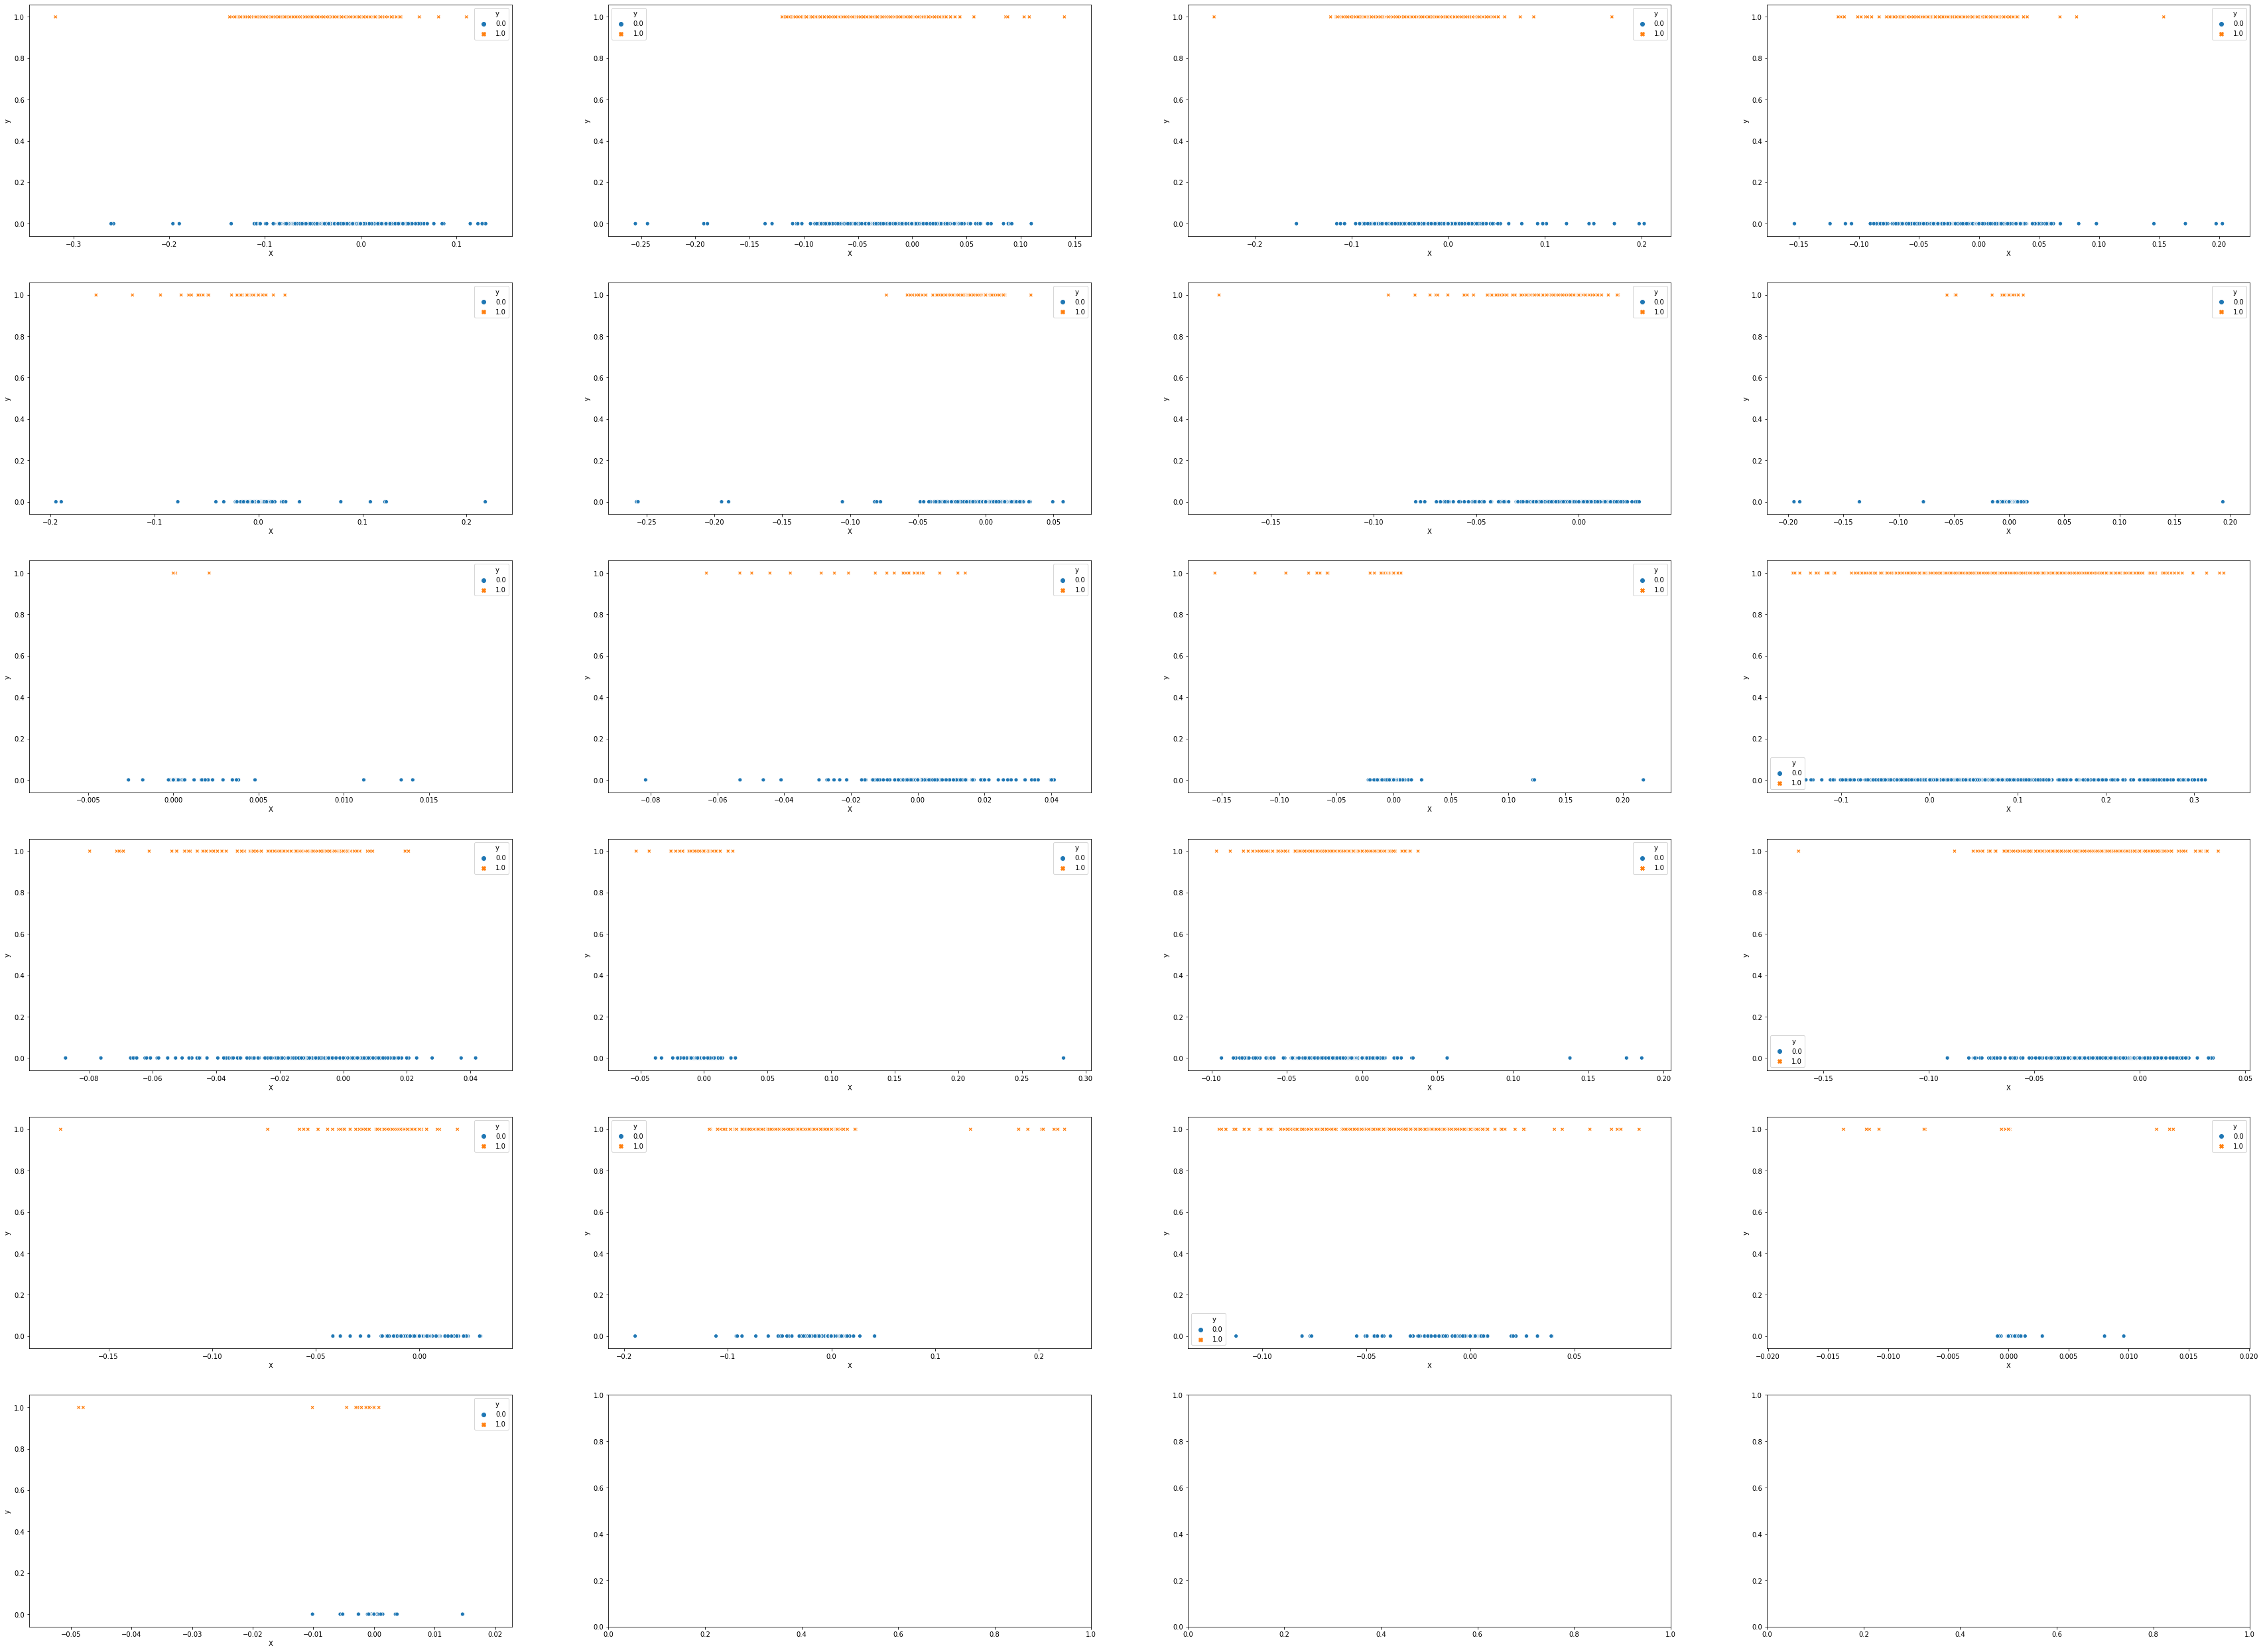

In [51]:
fig = plt.figure(figsize=(60, 45))
axes = fig.subplots(20//4+1, 4)
for idx, (morpho_tag_id, morpho_tag) in enumerate(id_to_morpho_tag.items()):
    if idx > 20:
        break
    entity_tag = "LOC"
    
    single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
    single_case_y = np.array([int(x == entity_tag) for x in region_entity_types]).reshape([-1, 1])
    
    single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])
    
    sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y", ax=axes[idx//4, idx%4])

In [52]:
def plot_single_case(entity_type, morpho_tag_id):
    single_case_X = concatenated_unnorm_explanations[:, morpho_tag_id].reshape([-1,1])
    single_case_y = np.array([int(x == entity_tag) for x in region_entity_types]).reshape([-1, 1])
    
    single_case_df = pd.DataFrame(np.concatenate((single_case_X, single_case_y), axis=1), columns=["X", "y"])
    
    sns.scatterplot(data=single_case_df, x="X", y="y", style="y", hue="y")

In [53]:
fig.savefig("Turkish-LOC-plot-binary-classification-problems.pdf")

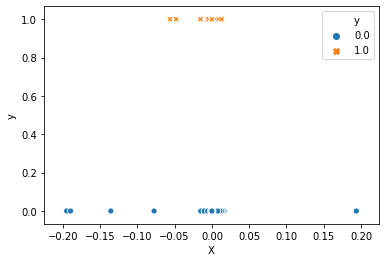

In [55]:
plot_single_case('LOC', 7)

In [56]:
turkish_binary_classification_df = pd.read_csv("../../binary-classification-problems-for-ner-train-turkish_model_100_size.txt",
                                               sep="\t",
                                               header=None,
                                               names=["label"] + [id_to_morpho_tag[idx] for idx in range(len(id_to_morpho_tag))])

In [73]:
turkish_binary_classification_df.head(10)

,label,Noun,A3sg,Pnon,Nom,Verb,Adj,P3sg,Pos^DB,Punc,...,ReflexP,ActOf^DB,Ques^DB,While^DB,Ratio^DB,InBetween^DB,Prog2^DB,Dup^DB,Distrib^DB,SinceDoingSo^DB
0,ORG,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,LOC,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LOC,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LOC,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ORG,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,LOC,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,LOC,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,LOC,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LOC,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LOC,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
import sklearn.metrics
common_morpho_tags = dict()
for entity_type in norm_explanations_nparray_dict.keys():
    mu_scores = []
    for idx, morpho_tag in id_to_morpho_tag.items():
        mu_scores.append((entity_type, morpho_tag, 
                          sklearn.metrics.mutual_info_score(turkish_binary_classification_df['label'] == entity_type, 
                                                            turkish_binary_classification_df[morpho_tag])))
    for entity_type, morpho_tag, mu_score in sorted(mu_scores, key=lambda x: x[2], reverse=True)[:10]:
        print(entity_type, morpho_tag, mu_score)
    mean_explanations_turkish = sorted([(entity_type, id_to_morpho_tag[idx], abs(mean_explanation_for_morpho_tag)) for idx, mean_explanation_for_morpho_tag in enumerate(list(np.mean(norm_explanations_nparray_dict[entity_type], axis=0)))],
       key=lambda x: x[2],
       reverse=True)[:10]
    print(mean_explanations_turkish)
    common_morpho_tags[entity_type] = set([x[1] for x in sorted(mu_scores, key=lambda x: x[2], reverse=True)[:10]]).intersection(set([x[1] for x in mean_explanations_turkish]))

ORG P3sg 0.05680902281198366
ORG Prop 0.02046790501450821
ORG A3pl 0.015069699681652466
ORG Adj 0.006174148453956849
ORG Nom^DB 0.004105142130007022
ORG Inf2 0.003886819792106211
ORG Punc 0.003242393758425002
ORG Pos^DB 0.002786773645110224
ORG P3pl 0.0025424262899655234
ORG Nom 0.002465314714005573
[('ORG', 'Pnon', 2.710403666989386), ('ORG', 'Prop', 1.3441345826604878), ('ORG', 'Nom', 0.9703557215745955), ('ORG', 'A3sg', 0.9621638276205237), ('ORG', 'Adj', 0.34915276924853494), ('ORG', 'P3sg', 0.21776575493032388), ('ORG', 'Noun^DB', 0.18890345817318568), ('ORG', 'Almost', 0.18890345817318566), ('ORG', 'A3pl', 0.16314830077378303), ('ORG', 'Verb', 0.13175602855525223)]
LOC Loc 0.041116399285259446
LOC Nom 0.0293724210574704
LOC Prop 0.02116921008210619
LOC Loc^DB 0.010216781139675401
LOC Rel 0.009327859865524268
LOC P3sg 0.004100762247211974
LOC A3pl 0.003527618589893278
LOC Gen 0.002973897951003876
LOC Pos^DB 0.001992511489122578
LOC Dat 0.0012998662766994656
[('LOC', 'Prop', 7.4892

In [91]:
for entity_type in common_morpho_tags.keys():
    print(entity_type, len(common_morpho_tags[entity_type]))
    print(common_morpho_tags[entity_type])

ORG 5
{'Adj', 'P3sg', 'Prop', 'A3pl', 'Nom'}
LOC 6
{'Loc', 'Dat', 'P3sg', 'Prop', 'Nom', 'Gen'}
PER 4
{'Adj', 'Gen', 'Dat', 'Nom'}


[('PER', 'Noun', 0.0003755418420374884),
 ('PER', 'A3sg', 0.00038970068531922475),
 ('PER', 'Pnon', 0.00018019785845982406),
 ('PER', 'Nom', 0.014291461837679598),
 ('PER', 'Verb', 6.243272225299815e-05),
 ('PER', 'Adj', 0.008592273738074085),
 ('PER', 'P3sg', 0.03871812690537742),
 ('PER', 'Pos^DB', 0.00039891277918326605),
 ('PER', 'Punc', 0.0010662923031864663),
 ('PER', 'A3pl', 0.005911648617903803),
 ('PER', 'Pos', 0.00022617645790439563),
 ('PER', 'Prop', 0.00011812578377082272),
 ('PER', 'Acc', 0.0001311729839542919),
 ('PER', 'Zero', 0.0006426533654507686),
 ('PER', 'P2sg', 2.5128129036901953e-06),
 ('PER', 'Gen', 0.0026399628102597994),
 ('PER', 'Nom^DB', 0.0016170916901587524),
 ('PER', 'Dat', 0.0027545235529197604),
 ('PER', 'Loc', 0.04238662251325195),
 ('PER', 'Adverb', 1.2602242326514336e-06),
 ('PER', 'Verb^DB', 2.6016608515504712e-05),
 ('PER', 'Conj', 0.0010684611482095398),
 ('PER', 'Num', 0.000638732481058492),
 ('PER', 'Pass', 9.89850368898795e-05),
 ('PER', 'P3pl',

In [72]:
from sklearn.linear_model import LogisticRegression

cl12_clf = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}
cl12_scores = {entity_type: dict() for entity_type in explanations_nparray_dict.keys()}

morpho_tags_that_are_more_successful = []

for entity_tag in explanations_nparray_dict.keys():
    for morpho_tag_id, morpho_tag in id_to_morpho_tag.items():
        
        cl12_clf[entity_tag][morpho_tag_id] = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='auto', max_iter=1000, verbose=0)
        single_feature_X = np.array(turkish_binary_classification_df[morpho_tag]).reshape([-1,1])
        binarized_y = np.array([int(x) for x in turkish_binary_classification_df['label'].apply(lambda x: x == entity_tag)])
        # print(binarized_y)
        y = binarized_y
        cl12_clf[entity_tag][morpho_tag_id].fit(single_feature_X, y)
        cl12_scores[entity_tag][morpho_tag_id] = cl12_clf[entity_tag][morpho_tag_id].score(single_feature_X, y)
        # print(scores)
        prior_prob_of_entity_tag_class = sum(binarized_y)/float(len(binarized_y))
        print(entity_tag, morpho_tag_id, morpho_tag, scores[entity_tag][morpho_tag_id], 
              prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class,
             max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class))
        if scores[entity_tag][morpho_tag_id] > max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class):
            morpho_tags_that_are_more_successful.append((entity_tag, morpho_tag_id, morpho_tag))
            
morpho_tags_that_are_more_successful




ORG 0 Noun 0.7199839019809506 0.280271865498122 0.719728134501878 0.719728134501878
ORG 1 A3sg 0.7199839019809506 0.280271865498122 0.719728134501878 0.719728134501878
ORG 2 Pnon 0.7191342843089031 0.280271865498122 0.719728134501878 0.719728134501878
ORG 3 Nom 0.7195367347851361 0.280271865498122 0.719728134501878 0.719728134501878
ORG 4 Verb 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 5 Adj 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 6 P3sg 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 7 Pos^DB 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 8 Punc 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 9 A3pl 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 10 Pos 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 11 Prop 0.7199391852613692 0.280271865498122 0.719728134501878 0.7197281

ORG 96 Acquire^DB 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 97 Ly 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 98 EDTag 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 99 ETTag 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 100 P2pl 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 101 Desr 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 102 Without 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 103 Without^DB 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 104 Interj 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 105 Neces 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 106 PCDat^DB 0.7197603183830434 0.280271865498122 0.719728134501878 0.719728134501878
ORG 107 Since 0.7197603183830434 0.2

LOC 7 Pos^DB 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 8 Punc 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 9 A3pl 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 10 Pos 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 11 Prop 0.7251263247328176 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 12 Acc 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 13 Zero 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 14 P2sg 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 15 Gen 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 16 Nom^DB 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 17 Dat 0.6968653579573403 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 18 Loc 0.70156061351

LOC 103 Without^DB 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 104 Interj 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 105 Neces 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 106 PCDat^DB 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 107 Since 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 108 JustLike^DB 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 109 Related 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 110 Pass^DB 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 111 Real 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 112 When 0.6969100746769217 0.30307637274190663 0.6969236272580934 0.6969236272580934
LOC 113 Prog2 0.6969100746769217 0.30307637274190663 0.6969236272580934 0

PER 14 P2sg 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 15 Gen 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 16 Nom^DB 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 17 Dat 0.5828824397442204 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 18 Loc 0.5829271564638018 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 19 Adverb 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 20 Verb^DB 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 21 Conj 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 22 Num 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 23 Pass 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 24 P3pl 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 25 Adj^DB 0.5833296069400

PER 109 Related 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 110 Pass^DB 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 111 Real 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 112 When 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 113 Prog2 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 114 Agt^DB 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 115 AsIf^DB 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 116 FeelLike 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 117 JustLike 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 118 PCIns 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.5833482382400286
PER 119 Gen^DB 0.5833296069400349 0.4166517617599714 0.5833482382400286 0.583348238240028

[('ORG', 0, 'Noun'),
 ('ORG', 1, 'A3sg'),
 ('ORG', 4, 'Verb'),
 ('ORG', 5, 'Adj'),
 ('ORG', 6, 'P3sg'),
 ('ORG', 7, 'Pos^DB'),
 ('ORG', 8, 'Punc'),
 ('ORG', 9, 'A3pl'),
 ('ORG', 10, 'Pos'),
 ('ORG', 11, 'Prop'),
 ('ORG', 12, 'Acc'),
 ('ORG', 13, 'Zero'),
 ('ORG', 14, 'P2sg'),
 ('ORG', 15, 'Gen'),
 ('ORG', 16, 'Nom^DB'),
 ('ORG', 17, 'Dat'),
 ('ORG', 18, 'Loc'),
 ('ORG', 19, 'Adverb'),
 ('ORG', 20, 'Verb^DB'),
 ('ORG', 21, 'Conj'),
 ('ORG', 22, 'Num'),
 ('ORG', 23, 'Pass'),
 ('ORG', 24, 'P3pl'),
 ('ORG', 25, 'Adj^DB'),
 ('ORG', 26, 'PastPart'),
 ('ORG', 27, 'Past'),
 ('ORG', 28, 'Det'),
 ('ORG', 29, 'Inf2'),
 ('ORG', 30, 'Postp'),
 ('ORG', 31, 'Card'),
 ('ORG', 32, 'Pron'),
 ('ORG', 33, 'Imp'),
 ('ORG', 34, 'Abl'),
 ('ORG', 35, 'PresPart'),
 ('ORG', 36, 'A2sg'),
 ('ORG', 37, 'Ness'),
 ('ORG', 38, 'Caus'),
 ('ORG', 39, 'Aor^DB'),
 ('ORG', 40, 'Prog1'),
 ('ORG', 41, 'Ins'),
 ('ORG', 42, 'Agt'),
 ('ORG', 43, 'Neg'),
 ('ORG', 44, 'Pres'),
 ('ORG', 45, 'With'),
 ('ORG', 46, 'Aor'),
 ('ORG', 

In [75]:
turkish_binary_classification_df['Prop'].describe()

count    22364.000000
mean         0.838893
std          0.367638
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Prop, dtype: float64

In [76]:
turkish_binary_classification_df['Noun'].describe()

count    22364.000000
mean         0.989492
std          0.101971
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Noun, dtype: float64

In [90]:
turkish_binary_classification_df.groupby(['label']).count()

,Noun,A3sg,Pnon,Nom,Verb,Adj,P3sg,Pos^DB,Punc,A3pl,...,ReflexP,ActOf^DB,Ques^DB,While^DB,Ratio^DB,InBetween^DB,Prog2^DB,Dup^DB,Distrib^DB,SinceDoingSo^DB
label,,,,,,,,,,,,,,,,,,,,,
LOC,6778,6778,6778,6778,6778,6778,6778,6778,6778,6778,...,6778,6778,6778,6778,6778,6778,6778,6778,6778,6778
ORG,6268,6268,6268,6268,6268,6268,6268,6268,6268,6268,...,6268,6268,6268,6268,6268,6268,6268,6268,6268,6268
PER,9318,9318,9318,9318,9318,9318,9318,9318,9318,9318,...,9318,9318,9318,9318,9318,9318,9318,9318,9318,9318


In [105]:
# all columns

all_columns_clf = dict()

for entity_tag in explanations_nparray_dict.keys():
    all_columns_clf[entity_tag] = LogisticRegression(random_state=0, solver='lbfgs',
                                      multi_class='auto', max_iter=1000, verbose=0)

    single_feature_X = np.array(turkish_binary_classification_df.iloc[:, 1:]).reshape([len(turkish_binary_classification_df),-1])
    binarized_y = np.array([int(x) for x in turkish_binary_classification_df['label'].apply(lambda x: x == entity_tag)])
    # print(binarized_y)
    y = binarized_y
    all_columns_clf[entity_tag].fit(single_feature_X, y)
    prior_prob_of_entity_tag_class = sum(binarized_y)/float(len(binarized_y))
    print("YES" if max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class) < all_columns_clf[entity_tag].score(single_feature_X, y) else "NO",
        entity_tag, all_columns_clf[entity_tag].score(single_feature_X, y), 
            prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class,
             max(prior_prob_of_entity_tag_class, 1-prior_prob_of_entity_tag_class))
    
    

YES ORG 0.7852351994276516 0.280271865498122 0.719728134501878 0.719728134501878
YES LOC 0.756662493292792 0.30307637274190663 0.6969236272580934 0.6969236272580934
YES PER 0.6527454838132714 0.4166517617599714 0.5833482382400286 0.5833482382400286


In [103]:
len(turkish_binary_classification_df)

22364

In [96]:
turkish_binary_classification_df.iloc[:, 1:].head(10)

,Noun,A3sg,Pnon,Nom,Verb,Adj,P3sg,Pos^DB,Punc,A3pl,...,ReflexP,ActOf^DB,Ques^DB,While^DB,Ratio^DB,InBetween^DB,Prog2^DB,Dup^DB,Distrib^DB,SinceDoingSo^DB
0,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
